# **DATA SCIENCE / SECTION 1 / PROJECT**


주제 : 다음 분기 출시 게임 선정

목적 : 기존의 데이터에 기반하여 인사이트를 얻고, 의사결정을 하고자 하는 것

프로젝트 최소 포함사항

1.   지역에 따라서 선호하는 게임 장르가 다를까

2.   연도별 게임의 트렌드가 있을까

1.   출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함








# 1. 데이터 생성

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

url = '/content/drive/MyDrive/data/vgames2.csv'
df = pd.read_csv(url)
df.head()


,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


# 2. 데이터 전처리

In [17]:
#결측치 및 데이터 정보확인

df.isnull().sum(),  df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


(Unnamed: 0       0
 Name             0
 Platform         0
 Year           271
 Genre           50
 Publisher       58
 NA_Sales         0
 EU_Sales         0
 JP_Sales         0
 Other_Sales      0
 dtype: int64, None)


*   Unnamed: 0,  Null,  object형식 확인
   항목 추가



의미없는데이터 삭제

In [22]:
#결측치 제거
df1 = df.dropna()

#사용하지 않는 Unnamed: 0 삭제
project_df = df1.drop(['Unnamed: 0'], axis = 1)

#project_df 확인 및 결측치 제거확인
project_df.head(), project_df.isnull().sum()


(                                             Name Platform  ...  JP_Sales Other_Sales
 0                    Candace Kane's Candy Factory       DS  ...         0           0
 1                                  The Munchables      Wii  ...         0        0.01
 2  Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  ...      0.02           0
 3                Deal or No Deal: Special Edition       DS  ...         0           0
 4       Ben 10 Ultimate Alien: Cosmic Destruction      PS3  ...         0        0.04
 
 [5 rows x 9 columns], Name           0
 Platform       0
 Year           0
 Genre          0
 Publisher      0
 NA_Sales       0
 EU_Sales       0
 JP_Sales       0
 Other_Sales    0
 dtype: int64)

In [24]:
#object변경 및 M,K처리
def tofloat(s):
  if 'K' in s:
    s = s.replace('K','')
    s = float(s)*1000
  elif 'M' in s:
    s = s.replace('M','')
    s = float(s)*1000000
  else:
    s = float(s)*1000000
  return s
# 각 지역별 적용
for i in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']:
     project_df[i] = project_df[i].apply(tofloat)
     

In [25]:
#연도별 정리
year_df = project_df.sort_values('Year')
year_df.head()


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
9276,Trade & Battle: Card Hero,GB,0.0,Strategy,Nintendo,0.0,0.0,200000.0,0.0
16394,Point Blank 3,PS,0.0,Shooter,Namco Bandai Games,10000.0,10000.0,0.0,0.0
14666,Strider 2,PS,0.0,Platform,Virgin Interactive,50000.0,30000.0,0.0,10000.0
2249,SplashDown,PS2,1.0,Racing,Atari,340000.0,270000.0,0.0,90000.0
8681,NCAA Football 2002,PS2,1.0,Sports,Electronic Arts,770000.0,600000.0,0.0,200000.0


Year 부분에 4자리가 아닌 데이터 발견하여 처리

In [26]:
#한자리와 두자리 21까지 2000년대
#두자리 21초과는 1900년대로 설정

def year(y):
  if 0<= y <10:
    y = y + 2000
  elif 10<= y <= 21:
    y = y + 2000
  elif 21< y < 100:
    y = y + 1900
  return y
project_df['Year'] = project_df['Year'].apply(year)
project_df['Year'] = project_df['Year'].astype({'Year':int})
project_df.head()


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40000.0,0.0,0.0,0.0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,20000.0,0.0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40000.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0


# 3. 데이터 분석

project 최소 포함사항




1.   지역에 따라서 선호하는 게임 장르가 다를까

2.   연도별 게임의 트렌드가 있을까

1.   출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함




다음 출시될 게임선정을 위한 분석




project 최소 포함사항

1.지역에 따라서 선호하는 게임 장르가 다를까?

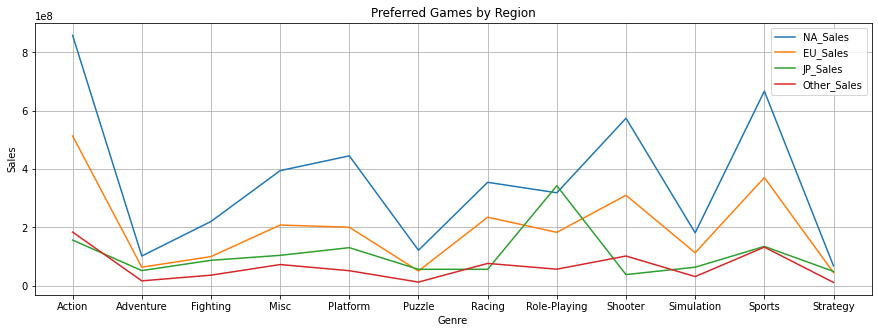

In [27]:
#1. 지역에 따라 선호하는 게임장르비교

na = project_df.groupby('Genre')['NA_Sales'].sum()
eu = project_df.groupby('Genre')['EU_Sales'].sum()
jp = project_df.groupby('Genre')['JP_Sales'].sum()
ot = project_df.groupby('Genre')['Other_Sales'].sum()


plt.figure(figsize=(15,5))
plt.plot(na), plt.plot(eu)
plt.plot(jp), plt.plot(ot)
plt.legend(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
plt.title('Preferred Games by Region')
plt.grid()
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.show()


상기 그래프와 같이 3개의 지역은 비슷한 경향을 보이나 JP지역만 롤플레잉 게임이 높은 다른 결과값을 가집니다.

각 지역별 최상위는 대체로 Action게임이지만 JP지역에서는 Role-Playing 게임이 최상위를 가지며 다음으로 Shooter와 Sports는 모든지역이 비슷한 양상을 보입니다.

따라서 JP지역의 Role-Playing과 Shooter장르를 제외하면 전체 지역이 비슷한 성향을 가진다고 판단됩니다.

2.연도별 게임의 트렌드가 있을까?

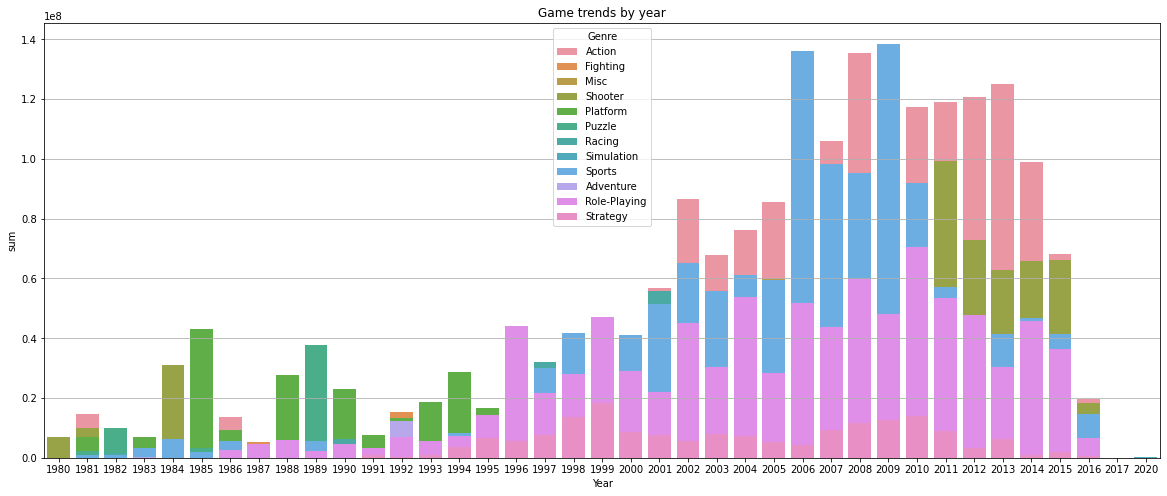

In [28]:
# 연도별 게임의 트렌드

sum_df = project_df.drop(['Name','Platform','Publisher','NA_Sales', 'EU_Sales' ,'JP_Sales', 'Other_Sales'], axis = 1)
sum_df['sum'] = project_df['NA_Sales']+ project_df['EU_Sales']+ project_df['JP_Sales']+ project_df['Other_Sales']
year_tr_df = sum_df.groupby(['Year', 'Genre'])['sum'].sum()
year_tr_df = year_tr_df.reset_index()
plt.figure(figsize=(20,8))
plt.title('Game trends by year')
plt.grid()
sns.barplot(x = 'Year', y = 'sum', hue = 'Genre', data = year_tr_df, dodge=False)
plt.show()


게임의 전체 판매량을 기준으로 보면 2002년~2015년까지 많은 출고량을 보이지만 2016년부터는 큰 하락세를 보입니다.

1900년대는 플렛폼의 초기 모델로 간단하고 단순한 게임이 주를 이루며

2000년대에 들면서 움직임이 많고 복잡한 게임이 늘어난 것을 볼 수 있습니다. 

이러한 결과는 시간이 지남에 따라 플렛폼의 성능의 향상과 관련 된 것으로 생각됩니다.

게임별 출고량과 총 출고량 비교



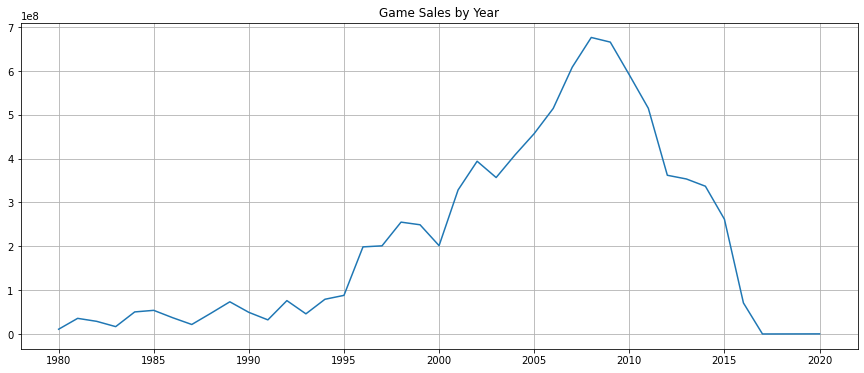

In [29]:
plt.figure(figsize=(15,6))
plt.title('Game Sales by Year')
plt.grid()
plt.plot(sum_df.groupby('Year')['sum'].sum())


총 판매량의 감소가 급격하게 이루어진 것은 스마트폰등과 같이 휴대성을 높은 제품으로 인한 결과로 생각됩니다. 

스마트폰이 대중화된 초창기에는 화면이 작고 많은 기능을 담아내지 못하였기에 비디오게임시장의 활성화가 

이어졌지만 2010년대 중반을 넘어오면서 비디오게임의 기능을 상당부분 충족하면서 급격하게 판매량이 하락한 것으로 보여집니다.

3.출고량이 높은 게임에 대한 분석 및 시각화 프로세스

상위15개의 게임와 전체 게임간의 판매량이 유의미한 차이가 있습니다. 0.0


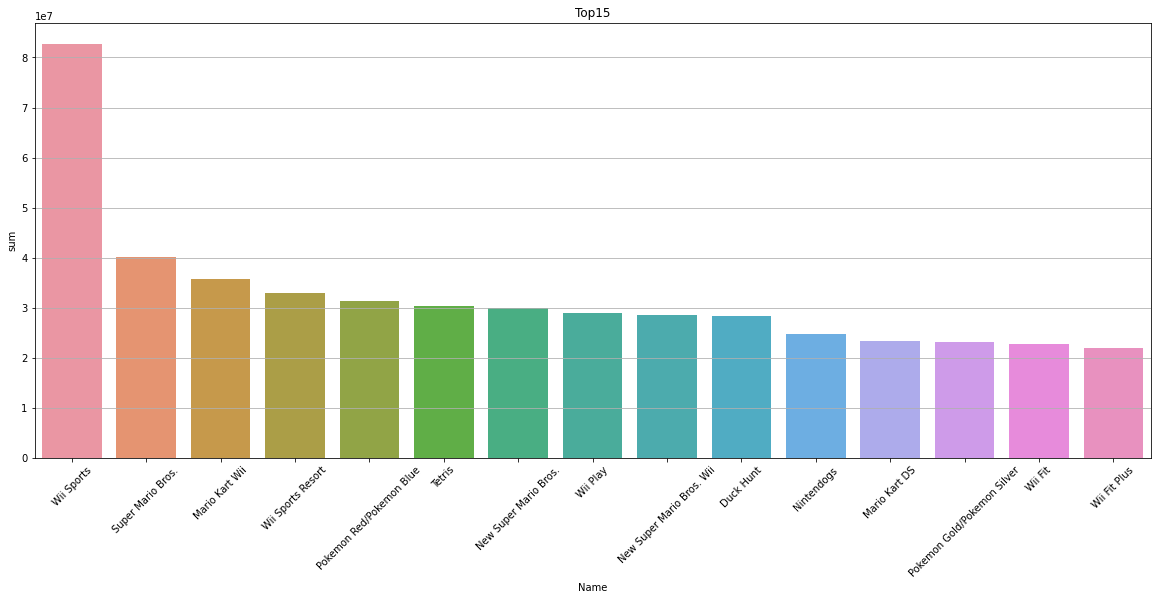

In [30]:
# 출고량이 높은 게임

sales_df = project_df.drop(['Year', 'Platform','Genre', 'Publisher','NA_Sales', 'EU_Sales' ,'JP_Sales', 'Other_Sales'], axis = 1)
sales_df['sum'] = project_df['NA_Sales']+ project_df['EU_Sales']+ project_df['JP_Sales']+ project_df['Other_Sales']

sales15_df = sales_df.nlargest(15,"sum")

plt.figure(figsize=(20,8))
plt.grid()
plt.title('Top15')
sns.barplot(x = 'Name', y = 'sum', data = sales15_df)
plt.xticks(fontsize=10, rotation=45)


#상위 15개의 게임와 전체 게임간의 판매량 차이 검증
fst = sales15_df['sum']  # 상위15개
scd = sales_df['sum']    #전체 
P_value = stats.ttest_ind(fst,scd).pvalue   #Two-Sample T-test
if P_value >= 0.05:
    print('상위15개의 게임와 전체 게임간의 판매량이 유의미한 차이는 없습니다.', P_value)
else:
    print('상위15개의 게임와 전체 게임간의 판매량이 유의미한 차이가 있습니다.', P_value)
plt.show()


게임명을 기준으로 각 지역의 전체 합계를 구했고 전체 게임을 시각화 하기에는 무리가 있어 상위15개를 선정하였습니다.

이후 상위15개의 게임과 전체 게임간의 판매량 차이 검증을 위해 투샘플 티테스트를 진행하였고

그 결과 상위 15개와 전체 게임간의 판매량은 유의미한 차이가 있음을 확인 할 수 있었습니다.

#4. 다음 출시될 게임선정을 위한 분석

다음 출시 게임은 1900년대와 2000년대 초반과는 많은 차이를 보여 최근 5년간의 데이터를 기준으로 선정하려 하였지만 2016년 이후의 출고량이 급격히 줄어들어 2010년 이후 데이터를 활용하였습니다.





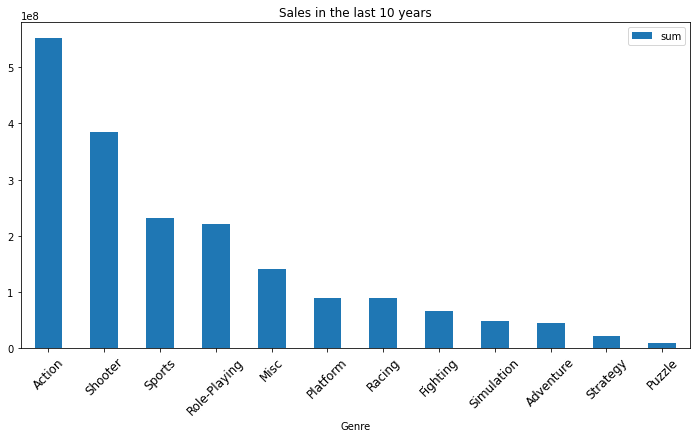

In [31]:
release_df = project_df.drop(['Name','Publisher'], axis = 1)
release_df['sum'] = release_df['NA_Sales']+ release_df['EU_Sales']+ release_df['JP_Sales']+ release_df['Other_Sales']
#2010년 이후 데이터만 필요
release_df = pd.DataFrame(release_df[release_df['Year'] >= 2011])

#10년간 장르별 총 판매량
genre_df = pd.DataFrame(release_df.groupby('Genre')['sum'].sum())
genre_df1 = genre_df.reset_index()
genre_df1 = genre_df1.sort_values('sum', ascending=False)
genre_df1.plot.bar(x = 'Genre', alpha = 1, figsize = (12,6))
plt.title('Sales in the last 10 years')
plt.xticks(fontsize=12, rotation=45)
plt.show()


최근 10년간 전지역 판매량 1/2/3위의 차이 분석





In [32]:
action = release_df[release_df['Genre'] == 'Action']['sum']     # Action게임 판매량
shooter = release_df[release_df['Genre'] == 'Shooter']['sum']   # Shooter게임 판매량
sports = release_df[release_df['Genre'] == 'Sports']['sum']     # Sports게임 판매량

#3그룹간 ANOVA Test진행
anova_P = stats.f_oneway(action, shooter, sports).pvalue
if anova_P >= 0.05:
    print('최근 10년간 전체 판매량의 Action/Shooter/Sports 간의 유의미한 차이는 없습니다.', anova_P)
else:
    print('최근 10년간 전체 판매량의 Action/Shooter/Sports 간의 유의미한 차이가 있습니다.', anova_P)


최근 10년간 전체 판매량의 Action/Shooter/Sports 간의 유의미한 차이가 있습니다. 4.440258704986167e-17


최근 10년간 전지역 판매량 1/2위간 차이 분석

In [33]:
ttest_G = stats.ttest_ind(action,shooter).pvalue   #Two-Sample T-test
if ttest_G >= 0.05:
    print('Action/Shooter 두 장르간의 판매량이 유의미한 차이는 없습니다.', ttest_G)
else:
    print('Action/Shooter 두 장르간의 판매량이 유의미한 차이가 있습니다.', ttest_G)


Action/Shooter 두 장르간의 판매량이 유의미한 차이가 있습니다. 1.7598195758801525e-16


따라서 최근 10년간 기준으로 Action게임이 가장 많은 판매량을 기록하였고 2/3위간의 차이가 있으며, 1/2위간의 차이도 존재합니다.

Action/Shooter간의 차이는 있지만 두 장르를 결합한 새로운 게임을 출시한다면 양쪽 그룹을 사용자를 만족할 것입니다.

Action/Shooter장르 기준의 플랫폼 선정

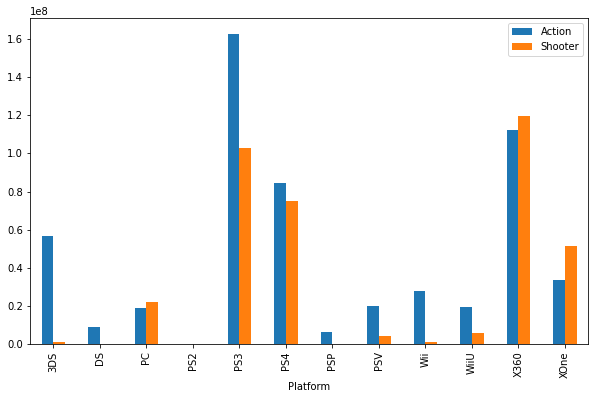

In [34]:
#Platform
action, shooter

action_df = pd.DataFrame(release_df[release_df['Genre'] == 'Action'])
action_df1 = pd.DataFrame(action_df.groupby('Platform')['sum'].sum())
action_df1 = action_df1.reset_index()

shooter_df = pd.DataFrame(release_df[release_df['Genre'] == 'Shooter'])
shooter_df1 = pd.DataFrame(shooter_df.groupby('Platform')['sum'].sum())
shooter_df1 = shooter_df1.reset_index()

merge_df = pd.merge(action_df1, shooter_df1, how = 'outer', on = 'Platform')
merge_df = merge_df.rename({'sum_x':'Action', 'sum_y':'Shooter'}, axis='columns')
merge_df = merge_df.fillna(0)
merge_df.plot.bar(x = 'Platform', alpha = 1, figsize = (10,6))
plt.show()


상기 그래프와 같이 Action장르는 PS3, Shooter장르는 X360이 가장 많은 판매량을 기록하였습니다. 


하지만 PS시리즈와 X시리즈 전체를 기준으로 보아야 조금 더 정확하게 선정할 수 있겠습니다.

In [35]:
#Action 합계
ac_ps = action_df1.iloc[3:5]['sum'].sum()
ac_xbox = action_df1.iloc[10:12]['sum'].sum()

#Shooter 합계
sh_ps = shooter_df1.iloc[3:5]['sum'].sum()
sh_xbox = shooter_df1.iloc[10:12]['sum'].sum()

if (ac_ps+sh_ps) > (ac_xbox+sh_xbox):
  print('PS Platform으로 출시한다.', '판매량차이 =',((ac_ps+sh_ps)-(ac_xbox+sh_xbox)))
else:
  print('Xbox Platform으로 출시한다.', '판매량차이 =',((ac_xbox+sh_xbox)-(ac_ps+sh_ps)))


PS Platform으로 출시한다. 판매량차이 = 195160000.0


PS 시리즈와 Xbox시리즈 간의 검증

In [36]:
merge_df['sum'] = merge_df['Action']+ merge_df['Shooter']

ps234 = ['PS2', 'PS3', 'PS4']
ps = merge_df[merge_df['Platform'].isin(ps234)]['sum']

xboxs = ['X360', 'XOne']
xbox = merge_df[merge_df['Platform'].isin(xboxs)]['sum']

ttest_P = stats.ttest_ind(ps,xbox).pvalue   #Two-Sample T-test
if ttest_P >= 0.05:
    print('PS시리즈와 Xbox시리즈간의 판매량이 유의미한 차이는 없습니다.', ttest_P)
else:
    print('PS시리즈와 Xbox시리즈간의 판매량이 유의미한 차이가 있습니다.', ttest_P)


PS시리즈와 Xbox시리즈간의 판매량이 유의미한 차이는 없습니다. 0.8936234959352292


PS 시리즈와 Xbox시리즈 간의 검증에서 두 Platform간의 유의미한 차이는 없으므로

 두 장르의 판매량이 더 많은 PS시리즈로의 출시가 좋을 것 같습니다.

# 5. 결론


1.   PS시리즈에서 최신의 Platform으로 Action 장르와 Shooter장르를 결합한 형태의 게임을 출시
2.   
Action게임은 Roll-playing장르가 인기있고 Shooter장르가 인기가 없는  JP지역에서도 적당한 판매량을 기록하였고

 Action 장르와 Shooter장르를 결합한 형태이기에 향후 Shooter장르에 흥미를 유발할 수 있을 것으로 생각됩니다.

